In [77]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [78]:
# Завантажити дані, вивести назви колонок і розмір датасета
# https://www.kaggle.com/datasets/aklimarimi/qs-world-ranked-universities-20182022
qs_csv = pd.read_csv("/home/kali/Desktop/data1.csv")
print(qs_csv.columns)
print("Size:")
print(qs_csv.shape)

Index(['Year', 'Rank', 'Name', 'Point', 'City', 'Country'], dtype='object')
Size:
(5250, 6)


In [79]:
#Опрацювати пропуски (по можливості заповнити їх або видалити)
qs_csv.isnull().sum()
qs_csv = qs_csv.dropna() 
qs_csv.isnull().sum()

Year       0
Rank       0
Name       0
Point      0
City       0
Country    0
dtype: int64

In [80]:
qs_csv

,Year,Rank,Name,Point,City,Country
0,2018,1,Harvard University,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States
...,...,...,...,...,...,...
5245,2022,346,National Cheng Kung University (NCKU),60.7,Tainan City,Taiwan
5246,2022,346,University of New Mexico,60.7,Albuquerque,United States
5247,2022,348,Universitas Indonesia,60.6,Depok,Indonesia
5248,2022,349,Aga Khan University,60.5,Karachi,Pakistan


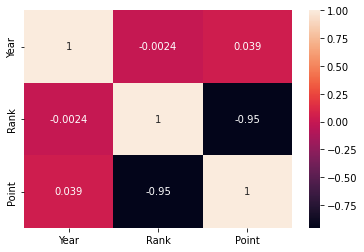

In [81]:
#Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою);
qs_csv_float  = qs_csv.drop(columns=['City', 'Country'], axis=1).set_index('Name') #Only float left
correlation = qs_csv_float.corr()
sns.heatmap(correlation, annot=True)
plt.show()

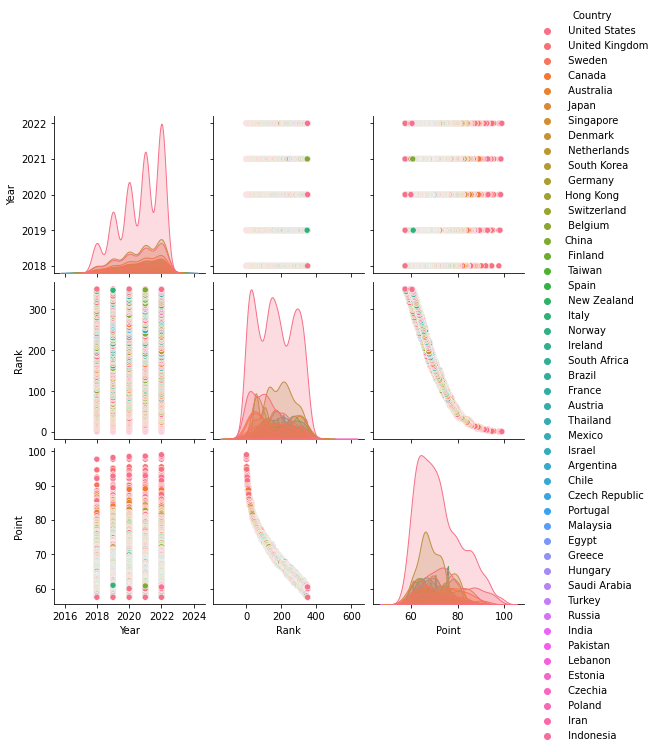

In [82]:
#побудувати гістограми розподілу ознак
sns.pairplot(qs_csv, hue="Country")


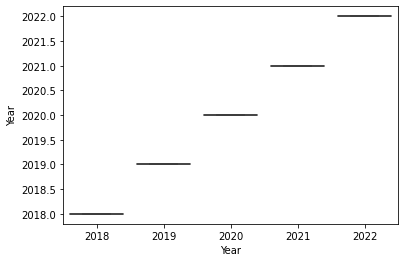

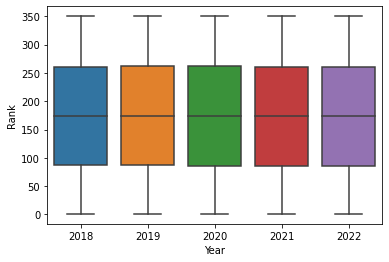

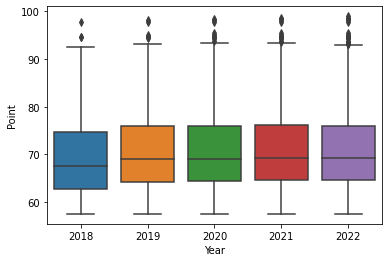

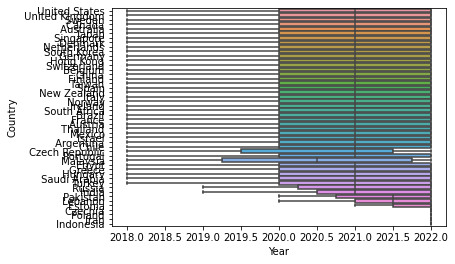

In [83]:
#boxplot-и ознак відносно цільової змінної 
qs_csv_new = qs_csv.drop(columns=['City'], axis=1).set_index('Name') 
for i in qs_csv_new.columns:
    figure = plt.figure()
    sns.boxplot(data=qs_csv_new, x='Year', y=qs_csv_new[i])

In [84]:
#4) Нормалізувати дані
x = qs_csv_float.drop(['Year'], axis=1)
y = qs_csv_float['Year']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(x_train.shape)
print(y_train.shape)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(3520, 2)
(3520,)


In [85]:
#5) knn
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print(accuracy_score(y_test,knn_predict))
print(classification_report(y_test,knn_predict))
print(confusion_matrix(y_test,knn_predict))

0.20079522862823063
              precision    recall  f1-score   support

        2018       0.13      0.31      0.19       104
        2019       0.14      0.16      0.15       216
        2020       0.12      0.11      0.11       294
        2021       0.22      0.20      0.21       407
        2022       0.31      0.26      0.28       488

    accuracy                           0.20      1509
   macro avg       0.19      0.21      0.19      1509
weighted avg       0.21      0.20      0.20      1509

[[ 32  30   9  14  19]
 [ 55  35  33  40  53]
 [ 48  56  31  86  73]
 [ 49  54  95  80 129]
 [ 56  69  86 152 125]]


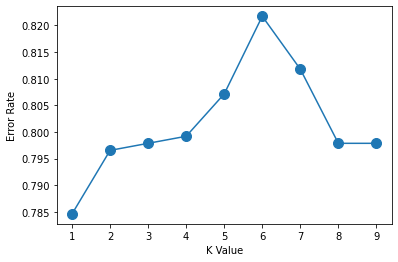

In [86]:
#Optimal knn
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict_i = knn.predict(x_test)
    error.append(np.mean(predict_i != y_test))
plt.plot(range(1,10), error, marker='o', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

In [87]:
# See that k=8 is the best
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print(accuracy_score(y_test,knn_predict))
print(classification_report(y_test,knn_predict))
print(confusion_matrix(y_test,knn_predict))

0.21537442014579192
              precision    recall  f1-score   support

        2018       0.13      0.15      0.14       104
        2019       0.09      0.08      0.08       216
        2020       0.14      0.15      0.15       294
        2021       0.19      0.16      0.17       407
        2022       0.34      0.37      0.35       488

    accuracy                           0.22      1509
   macro avg       0.18      0.18      0.18      1509
weighted avg       0.21      0.22      0.21      1509

[[ 16  13  23  25  27]
 [ 32  17  40  56  71]
 [ 19  49  43  91  92]
 [ 28  51  91  67 170]
 [ 27  56 100 123 182]]


In [89]:
#SVM
svm = SVC(C=1, gamma = 1, kernel = 'rbf')
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)
print(accuracy_score(y_test,svm_predict))
print(classification_report(y_test, svm_predict))
print(confusion_matrix(y_test, svm_predict))

0.32339297548045065
              precision    recall  f1-score   support

        2018       0.00      0.00      0.00       104
        2019       0.00      0.00      0.00       216
        2020       0.00      0.00      0.00       294
        2021       0.00      0.00      0.00       407
        2022       0.32      1.00      0.49       488

    accuracy                           0.32      1509
   macro avg       0.06      0.20      0.10      1509
weighted avg       0.10      0.32      0.16      1509

[[  0   0   0   0 104]
 [  0   0   0   0 216]
 [  0   0   0   0 294]
 [  0   0   0   0 407]
 [  0   0   0   0 488]]


In [90]:
#Optimal SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [91]:
svm = SVC(C=0.1, gamma = 1, kernel = 'rbf')
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)
print(accuracy_score(y_test,svm_predict))
print(classification_report(y_test, svm_predict))
print(confusion_matrix(y_test, svm_predict))

0.32339297548045065
              precision    recall  f1-score   support

        2018       0.00      0.00      0.00       104
        2019       0.00      0.00      0.00       216
        2020       0.00      0.00      0.00       294
        2021       0.00      0.00      0.00       407
        2022       0.32      1.00      0.49       488

    accuracy                           0.32      1509
   macro avg       0.06      0.20      0.10      1509
weighted avg       0.10      0.32      0.16      1509

[[  0   0   0   0 104]
 [  0   0   0   0 216]
 [  0   0   0   0 294]
 [  0   0   0   0 407]
 [  0   0   0   0 488]]


In [92]:
#Tree criterion='gini'
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(x_train, y_train)
tree_predict = tree.predict(x_test)
print(accuracy_score(y_test,svm_predict))
print(classification_report(y_test, svm_predict))
print(confusion_matrix(y_test, svm_predict))

0.32339297548045065
              precision    recall  f1-score   support

        2018       0.00      0.00      0.00       104
        2019       0.00      0.00      0.00       216
        2020       0.00      0.00      0.00       294
        2021       0.00      0.00      0.00       407
        2022       0.32      1.00      0.49       488

    accuracy                           0.32      1509
   macro avg       0.06      0.20      0.10      1509
weighted avg       0.10      0.32      0.16      1509

[[  0   0   0   0 104]
 [  0   0   0   0 216]
 [  0   0   0   0 294]
 [  0   0   0   0 407]
 [  0   0   0   0 488]]


In [93]:
#Tree criterion='entropy'
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)
tree_predict = tree.predict(x_test)
print(accuracy_score(y_test,svm_predict))
print(classification_report(y_test, svm_predict))
print(confusion_matrix(y_test, svm_predict))

0.32339297548045065
              precision    recall  f1-score   support

        2018       0.00      0.00      0.00       104
        2019       0.00      0.00      0.00       216
        2020       0.00      0.00      0.00       294
        2021       0.00      0.00      0.00       407
        2022       0.32      1.00      0.49       488

    accuracy                           0.32      1509
   macro avg       0.06      0.20      0.10      1509
weighted avg       0.10      0.32      0.16      1509

[[  0   0   0   0 104]
 [  0   0   0   0 216]
 [  0   0   0   0 294]
 [  0   0   0   0 407]
 [  0   0   0   0 488]]


In [94]:
#RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
print(accuracy_score(y_test,rf_predict))
print(classification_report(y_test, rf_predict))
print(confusion_matrix(y_test, rf_predict))

0.20410868124585818
              precision    recall  f1-score   support

        2018       0.11      0.06      0.07       104
        2019       0.05      0.03      0.04       216
        2020       0.11      0.09      0.10       294
        2021       0.15      0.14      0.15       407
        2022       0.29      0.44      0.35       488

    accuracy                           0.20      1509
   macro avg       0.14      0.15      0.14      1509
weighted avg       0.17      0.20      0.18      1509

[[  6  10  19  23  46]
 [ 13   6  37  62  98]
 [ 12  33  25  82 142]
 [ 14  33  73  57 230]
 [ 11  37  75 151 214]]


In [95]:
#AdaBoost
svc1=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=10, estimator=svc1,learning_rate=1)
model = abc.fit(x_train, y_train)
ada_predict = model.predict(x_test)
print(accuracy_score(y_test,ada_predict))
print(classification_report(y_test, ada_predict))
print(confusion_matrix(y_test, ada_predict))

0.32339297548045065
              precision    recall  f1-score   support

        2018       0.00      0.00      0.00       104
        2019       0.00      0.00      0.00       216
        2020       0.00      0.00      0.00       294
        2021       0.00      0.00      0.00       407
        2022       0.32      1.00      0.49       488

    accuracy                           0.32      1509
   macro avg       0.06      0.20      0.10      1509
weighted avg       0.10      0.32      0.16      1509

[[  0   0   0   0 104]
 [  0   0   0   0 216]
 [  0   0   0   0 294]
 [  0   0   0   0 407]
 [  0   0   0   0 488]]
